# 주제 : 최동원 선수가 현역 선수라면 연봉이 얼마일까?

- 가정1 : 다음 해의 연봉은 올해의 성적에 따라 결정된다.
    - 단점 : '꾸준함' 을 연봉에 반영하기 어렵다
<br>
<br>
- 가정2 : 마무리 투수의 구분은 그 해의 규정이닝을 넘겼는가로 판단한다.
- 세부사항

    - 전년도 데이터를 학습, 다음 년도 연봉을 라벨로 붙인다
<br>
    ->(연봉조정신청 및 FA 제도를 고민하기에는, 이전 시기와 현재의 제도를 변수화해야 하기 때문에 일단은 배제)

    - 현역 선수의 연봉은 어떻게 산정이 되는가? : 결정요소는 무엇인가?

    - 최동원 선수는 결정요소로 판단된 지표가 어떻게 되는가?

    - 최동원 선수가 현역이라면 연봉이 얼마일까?
<br>
    -> 최동원 선수가 마무리로 뛸 때, 선발로 뛸 때, 연봉이 얼마가 될까?

### 문제 1. 2015~2020 선수 경기 스탯 및 연봉 / 1983~1988 최동원 선수 스탯

우선 최동원 선수의 데이터를 가지고 오기로 했습니다.
<br>
<br>
결국 우리의 모델은 최동원 선수의 데이터를 기반으로 예측해야 하기 때문에,
<br>
<br>
현재 선수들에 대한 세부지표가 늘었다고 하더라도 그 시기에 기록되지 않은 것은 의미가 없습니다.
<br>
<br>
최동원 선수의 데이터가 세부지표까지 자세히 나와있는 곳은 스탯티즈였습니다. 
<br>
<br>
최동원 선수와 현재 가지고 있는 데이터를 비교해보고, 필요한 데이터를 더 가져오거나 
<br>
<br>
있는 데이터를 필요에 맞게 가공해야 했습니다.

In [2]:
# 최동원 선수 테이블 가져오기
import requests
import time
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import pandas as pd
from selenium import webdriver

urls = ['http://www.statiz.co.kr/player.php?opt=1&sopt=0&name=%EC%B5%9C%EB%8F%99%EC%9B%90&birth=1958-05-24&re=1&se=0&da=1',
'http://www.statiz.co.kr/player.php?opt=1&sopt=0&name=%EC%B5%9C%EB%8F%99%EC%9B%90&birth=1958-05-24&re=1&se=0&da=2']

choi = []

for url in urls:
    driver = webdriver.Chrome('./driver/chromedriver')
    req = driver.get(url)
    time.sleep(4)
    res = driver.page_source
    soup = BeautifulSoup(res, 'html.parser')
    time.sleep(4)
    data = soup.find('table',{'style':'font-size:;'})
    time.sleep(4)
    table = parser_functions.make2d(data)
    df = pd.DataFrame(data=table[2:], columns=table[1])
    choi.append(df)

choi = pd.merge(choi[0], choi[1])
choi = choi.head(6)

C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\2998157653.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')
C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\2998157653.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [3]:
choi.columns

Index(['연도', '팀', '나이', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA', 'K/9', 'BB/9',
       'K/BB', 'HR/9', 'K%', 'BB%', 'K-BB%', 'PFR', 'BABIP', 'LOB%', '타율',
       '출루율', '장타율', 'OPS', 'WHIP+', '투구', 'IP/G', 'P/G', 'P/IP', 'P/PA',
       'CYP'],
      dtype='object')

In [4]:
choi

,연도,팀,나이,출장,완투,완봉,선발,승,패,세,...,출루율,장타율,OPS,WHIP+,투구,IP/G,P/G,P/IP,P/PA,CYP
0,1983,롯데,25,38,16,1,21,9,16,4,...,0.309,,,1.25,,5.5,,,,61.1
1,1984,롯데,26,51,14,1,20,27,13,6,...,0.280,,,1.09,,5.6,,,,115.6
2,1985,롯데,27,42,14,4,17,20,9,8,...,0.257,,,0.97,,5.4,,,,100.6
3,1986,롯데,28,39,17,4,21,19,14,2,...,0.262,,,0.99,,6.9,,,,127.3
4,1987,롯데,29,32,15,4,22,14,12,2,...,0.317,,,1.28,,7.0,,,,72.3
5,1988,롯데,30,16,3,1,4,7,3,3,...,0.298,,,1.22,,5.2,,,,38.0


아주 잘 가져온 것을 확인 가능합니다!

다음으로는 2015년부터 2020년까지의 선수들의 연도별 데이터입니다.
<br>
<br>
일단 선수들의 연간 스탯을 알기 위해서는 크롤링이 필요했습니다.
<br>
<br>
참고한 사이트는 KBReport입니다.

In [5]:
whole = []

for year in range(2015, 2021, 1):
    urls = ['''
            http://www.kbreport.com/leader/pitcher/main?rows=20&order=WAR&\
            orderType=DESC&teamId=&pitcher_type=&year_from={}&year_to={}&\
            gameType=&split01=&split02_1=&split02_2=&r_inning_count=&inning_count=0
            '''.format(year, year),
            '''
            http://www.kbreport.com/leader/pitcher/standard?rows=20&order=WAR&\
            orderType=DESC&teamId=&pitcher_type=&year_from={}&year_to={}&\
            gameType=&split01=&split02_1=&split02_2=&r_inning_count=&inning_count=0
            '''.format(year, year),
            '''
            http://www.kbreport.com/leader/pitcher/advanced?rows=20&order=WAR&\
            orderType=DESC&teamId=&pitcher_type=&year_from={}&year_to={}&\
            gameType=&split01=&split02_1=&split02_2=&r_inning_count=&inning_count=0
            '''.format(year, year)
            ]
    # send keys를 우선 100으로 준 다음에 다음 페이지를 살펴봐야 하는 것
    # (클릭으로, 1초 간격)
    for idx, url in enumerate(urls):
        df1 = []
        df2 = []
        df3 = []
        driver = webdriver.Chrome('./driver/chromedriver')
        req = driver.get(url)
        data_row = driver.find_element_by_css_selector('#resultListDiv > div.page-row-box > select')
        data_row.send_keys('100')
        for i in range(1, 4):
            time.sleep(3)
            res = driver.page_source
            soup = BeautifulSoup(res, 'html.parser')
            # 테이블명 설정해야 함
            data = soup.find('table',{'class':'ltb-table responsive'})
            time.sleep(3)
            table = parser_functions.make2d(data)
            df = pd.DataFrame(data=table[1:], columns=table[0])
            if idx == 0:
                df1.append(df)
            elif idx == 1:
                df2.append(df)
            else:
                df3.append(df)
            # 다음 페이지 클릭하기
            if i == 1:
                driver.find_element_by_css_selector('#paging > a:nth-child(4)').click()
            elif i == 2:
                driver.find_element_by_css_selector('#paging > a:nth-child(5)').click()
            else:
                if idx == 0:
                    parted1 = pd.concat(df1, ignore_index=True)
                elif idx == 1:
                    parted2 = pd.concat(df2, ignore_index=True)
                else:
                    parted3 = pd.concat(df3, ignore_index=True)
                break
    # standard data와 advanced data를 합치기
    players = pd.merge(parted1, parted2)
    players = pd.merge(players, parted3)
    players['연도'] = [year] * len(players)
    # 그대로 전체 데이터 목록에 더해줄 준비(연도 칼럼 추가)
    whole.append(players)
whole = pd.concat(whole, ignore_index=True)

C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\1496590135.py:26: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')
C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\1496590135.py:28: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  data_row = driver.find_element_by_css_selector('#resultListDiv > div.page-row-box > select')
C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\1496590135.py:47: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#paging > a:nth-child(4)').click()
C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\1496590135.py:49: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.

By 모듈을 사용해 보았는데 실행이 되지 않아서 그냥 기존 코드를 그대로 사용했습니다.

In [6]:
whole.columns

Index(['#', '선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '완투', '완봉', 'QS', '타자', '안타', '2루타', '3루타', '홈런', '실점', '자책', '삼진',
       '볼넷', '고4', 'HBP', '폭투', '보크', 'PK', '도루', '도실', '삼진%', '볼넷%', '삼/볼',
       '피안타율', '피출루율', '피장타율', '피OPS', 'WHIP', '연도'],
      dtype='object')

In [7]:
whole.head()

,#,선수명,팀명,승,패,세,홀드,블론,경기,선발,...,도실,삼진%,볼넷%,삼/볼,피안타율,피출루율,피장타율,피OPS,WHIP,연도
0,1,소사,LG,10,12,0,1,0,32,30,...,11,21.9,4.4,4.92,0.266,0.302,0.402,0.704,1.21,2015
1,2,밴헤켄,Hero,15,8,0,0,0,32,32,...,5,23.4,8.1,2.88,0.257,0.318,0.371,0.689,1.31,2015
2,3,해커,NC,19,5,0,0,0,31,31,...,6,19.7,4.3,4.56,0.232,0.287,0.333,0.621,1.03,2015
3,4,윤성환,삼성,17,8,0,0,0,30,30,...,5,20.3,3.7,5.47,0.264,0.299,0.427,0.726,1.18,2015
4,5,린드블럼,롯데,13,11,0,0,0,32,32,...,11,20.9,6.0,3.46,0.250,0.306,0.406,0.711,1.18,2015


원하는 데이터가 잘 들어온 것을 확인했습니다.

In [8]:
whole.shape

(1533, 49)

In [9]:
print(choi.columns)
print(whole.columns)

Index(['연도', '팀', '나이', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA', 'K/9', 'BB/9',
       'K/BB', 'HR/9', 'K%', 'BB%', 'K-BB%', 'PFR', 'BABIP', 'LOB%', '타율',
       '출루율', '장타율', 'OPS', 'WHIP+', '투구', 'IP/G', 'P/G', 'P/IP', 'P/PA',
       'CYP'],
      dtype='object')
Index(['#', '선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '완투', '완봉', 'QS', '타자', '안타', '2루타', '3루타', '홈런', '실점', '자책', '삼진',
       '볼넷', '고4', 'HBP', '폭투', '보크', 'PK', '도루', '도실', '삼진%', '볼넷%', '삼/볼',
       '피안타율', '피출루율', '피장타율', '피OPS', 'WHIP', '연도'],
      dtype='object')


이제는 최동원 선수의 데이터에 맞게 전체 선수들의 데이터를 가공해 줄 차례입니다.
<br>
<br>
최동원 선수의 데이터에서 일단 누락된 값이 있는 부분을 삭제한 뒤, 
<br>
<br>
전체 선수들의 데이터를 그에 맞게 조정할 계획입니다. 


In [10]:
choi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      6 non-null      object
 1   팀       6 non-null      object
 2   나이      6 non-null      object
 3   출장      6 non-null      object
 4   완투      6 non-null      object
 5   완봉      6 non-null      object
 6   선발      6 non-null      object
 7   승       6 non-null      object
 8   패       6 non-null      object
 9   세       6 non-null      object
 10  홀드      6 non-null      object
 11  이닝      6 non-null      object
 12  실점      6 non-null      object
 13  자책      6 non-null      object
 14  타자      6 non-null      object
 15  안타      6 non-null      object
 16  2타      6 non-null      object
 17  3타      6 non-null      object
 18  홈런      6 non-null      object
 19  볼넷      6 non-null      object
 20  고4      6 non-null      object
 21  사구      6 non-null      object
 22  삼진      6 non-null      object

In [11]:
choi

,연도,팀,나이,출장,완투,완봉,선발,승,패,세,...,출루율,장타율,OPS,WHIP+,투구,IP/G,P/G,P/IP,P/PA,CYP
0,1983,롯데,25,38,16,1,21,9,16,4,...,0.309,,,1.25,,5.5,,,,61.1
1,1984,롯데,26,51,14,1,20,27,13,6,...,0.280,,,1.09,,5.6,,,,115.6
2,1985,롯데,27,42,14,4,17,20,9,8,...,0.257,,,0.97,,5.4,,,,100.6
3,1986,롯데,28,39,17,4,21,19,14,2,...,0.262,,,0.99,,6.9,,,,127.3
4,1987,롯데,29,32,15,4,22,14,12,2,...,0.317,,,1.28,,7.0,,,,72.3
5,1988,롯데,30,16,3,1,4,7,3,3,...,0.298,,,1.22,,5.2,,,,38.0


info 에서는 다 non-null 값이라고 나오지만
<br>
<br>
장타율, OPS 등 빈 데이터가 많이 보입니다. 여기서 저는 빈 데이터를 사이트에서 확인 후
<br>
<br>
해당 칼럼의 이름을 직접 사이트에서 찾아 삭제할 생각입니다.

In [12]:
choi.columns

Index(['연도', '팀', '나이', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
       '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA', 'K/9', 'BB/9',
       'K/BB', 'HR/9', 'K%', 'BB%', 'K-BB%', 'PFR', 'BABIP', 'LOB%', '타율',
       '출루율', '장타율', 'OPS', 'WHIP+', '투구', 'IP/G', 'P/G', 'P/IP', 'P/PA',
       'CYP'],
      dtype='object')

In [13]:
choi = choi.drop([
    '2타',
    '3타',
    'WPA',
    '장타율',
    'OPS',
    '투구',
    'P/G',
    'P/IP',
    'P/PA'], axis=1)

In [14]:
choi

,연도,팀,나이,출장,완투,완봉,선발,승,패,세,...,BB%,K-BB%,PFR,BABIP,LOB%,타율,출루율,WHIP+,IP/G,CYP
0,1983,롯데,25,38,16,1,21,9,16,4,...,5.9,11.2,0.95,0.297,72.5,0.257,0.309,1.25,5.5,61.1
1,1984,롯데,26,51,14,1,20,27,13,6,...,6.0,13.7,1.02,0.267,77.0,0.224,0.280,1.09,5.6,115.6
2,1985,롯데,27,42,14,4,17,20,9,8,...,4.7,13.9,0.90,0.257,76.0,0.214,0.257,0.97,5.4,100.6
3,1986,롯데,28,39,17,4,21,19,14,2,...,5.3,14.7,0.99,0.268,80.3,0.215,0.262,0.99,6.9,127.3
4,1987,롯데,29,32,15,4,22,14,12,2,...,6.6,11.1,1.00,0.318,74.2,0.262,0.317,1.28,7.0,72.3
5,1988,롯데,30,16,3,1,4,7,3,3,...,6.9,16.9,1.28,0.317,80.9,0.244,0.298,1.22,5.2,38.0


빈 값이 삭제되었습니다.
<br>
<br>
다음으로는 선수 전체 데이터입니다.
<br>
<br>
최동원 선수의 데이터에 해당하는 칼럼을 제외하고 나머지 부분을 삭제할 계획입니다.
<br>
<br>
반대로 최동원 선수의 데이터에만 있는 칼럼도 삭제할 것입니다.
<br>
<br>
과정을 거치기 전, 수집한 데이터를 복사해 주고 진행할 것입니다.
<br>
<br>
해당 과정은 위와 같은 방식으로 진행될 예정입니다.

In [15]:
whole.columns

Index(['#', '선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '완투', '완봉', 'QS', '타자', '안타', '2루타', '3루타', '홈런', '실점', '자책', '삼진',
       '볼넷', '고4', 'HBP', '폭투', '보크', 'PK', '도루', '도실', '삼진%', '볼넷%', '삼/볼',
       '피안타율', '피출루율', '피장타율', '피OPS', 'WHIP', '연도'],
      dtype='object')

In [16]:
choi.columns

Index(['연도', '팀', '나이', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA',
       'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'K/9', 'BB/9', 'K/BB', 'HR/9',
       'K%', 'BB%', 'K-BB%', 'PFR', 'BABIP', 'LOB%', '타율', '출루율', 'WHIP+',
       'IP/G', 'CYP'],
      dtype='object')

In [17]:
whole_copy = whole.copy()
choi_copy = choi.copy()

whole_copy = whole_copy.drop([
    '#',
    'RA9-WAR',
    'kFIP',
    'PK',
    '도루',
    '도실',
    '피장타율',
    '피OPS',
    '블론',
    'QS'], axis=1)

In [18]:
whole_copy.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'FIP', 'WAR', '완투', '완봉', '타자', '안타',
       '2루타', '3루타', '홈런', '실점', '자책', '삼진', '볼넷', '고4', 'HBP', '폭투', '보크',
       '삼진%', '볼넷%', '삼/볼', '피안타율', '피출루율', 'WHIP', '연도'],
      dtype='object')

In [19]:
choi_copy.columns

Index(['연도', '팀', '나이', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝',
       '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA',
       'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'K/9', 'BB/9', 'K/BB', 'HR/9',
       'K%', 'BB%', 'K-BB%', 'PFR', 'BABIP', 'LOB%', '타율', '출루율', 'WHIP+',
       'IP/G', 'CYP'],
      dtype='object')

다음은 바로 최동원 선수의 데이터 중 전체 선수 데이터에는 없는 필드를 삭제할 차례입니다.
<br>
<br>
최동원 선수 데이터의 칼럼 중, 연도 데이터는 삭제하겠습니다.
<br>
<br>
이유는 저희가 최동원 선수가 현재 현역 선수라면 어떤 연봉을 받을 지 예측하는 모델을 설계하고 있기 때문입니다.

In [20]:
choi_copy = choi_copy.drop([
    '연도',
    '나이',
    'ERA+',
    'FIP+',
    'PFR',
    'WHIP+',
    'IP/G',
    'CYP'], axis=1)

In [21]:
choi_copy.columns

Index(['팀', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책',
       '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP',
       'WHIP', 'WAR', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'K-BB%',
       'BABIP', 'LOB%', '타율', '출루율'],
      dtype='object')

그 이후, 최동원 데이터의 필드 순서와 이름에 맞게
<br>
<br>
전체 선수 데이터의 필드를 조정할 계획입니다.

In [22]:
whole_copy.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'FIP', 'WAR', '완투', '완봉', '타자', '안타',
       '2루타', '3루타', '홈런', '실점', '자책', '삼진', '볼넷', '고4', 'HBP', '폭투', '보크',
       '삼진%', '볼넷%', '삼/볼', '피안타율', '피출루율', 'WHIP', '연도'],
      dtype='object')

In [23]:
# 39개로 맞추어야 한다. - 연도와 선수명 포함되기 때문에
len(['선수명', '팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', 
       '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA', 'FIP',
       'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%',
       'BABIP', 'LOB%', '피안타율', '피출루율', '연도',
       '2루타', '3루타'])

39

In [24]:
whole_copy = whole_copy[['선수명', '팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', 
       '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA', 'FIP',
       'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%',
       'BABIP', 'LOB%', '피안타율', '피출루율', '연도',
       '2루타', '3루타']]

미처 지우지 못했던 칼럼들을 지워줍니다.

In [25]:
whole_copy = whole_copy.drop([
    '2루타',
    '3루타',
    ], axis=1)

choi_copy = choi_copy.drop([
    'K-BB%',
    ], axis=1)

In [26]:
len(whole_copy.columns)

37

In [27]:
len(choi_copy.columns)

35

선수명과 연도가 포함되기 때문에 갯수는 딱 맞는 것으로 확인되었습니다.
<br>
<br>
그리고 최동원 선수 데이터의 칼럼 이름과 전체 데이터 칼럼 이름을 맞추어 줄 것입니다.

In [28]:
whole_copy.columns

Index(['선수명', '팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점',
       '자책', '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA',
       'FIP', 'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%',
       'BABIP', 'LOB%', '피안타율', '피출루율', '연도'],
      dtype='object')

In [29]:
choi_copy.columns

Index(['팀', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책',
       '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP',
       'WHIP', 'WAR', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 'BABIP',
       'LOB%', '타율', '출루율'],
      dtype='object')

In [30]:
choi_copy = choi_copy.rename(columns={
    '팀':'팀명', '출장':'경기', '사구':'HBP', 'K/9':'삼진/9', 'BB/9':'볼넷/9',
    'K/BB':'삼/볼', 'HR/9':'홈런/9', 'K%':'삼진%', 'BB%':'볼넷%',
    '타율':'피안타율', '출루율':'피출루율'
})

In [31]:
whole_copy.columns

Index(['선수명', '팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점',
       '자책', '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA',
       'FIP', 'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%',
       'BABIP', 'LOB%', '피안타율', '피출루율', '연도'],
      dtype='object')

In [32]:
choi_copy.columns

Index(['팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책',
       '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA', 'FIP',
       'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%', 'BABIP',
       'LOB%', '피안타율', '피출루율'],
      dtype='object')

여기서 전체 데이터 및 최동원 투수의 선발/마무리 여부를 결정할 칼럼을 추가할 예정입니다.
<br>
<br>
선발/마무리의 구분은 일반적으로 미리 정해놓지만, 실제로 성적 결산에서는
<br>
<br>
미리 정해진 보직이 아니라 선발로 얼마나 나와 주었는가가 더 큰 영향을 미칩니다. 
<br>
<br>
현대야구에서는 정해진 보직 없이 팀의 필요에 따라 맞추어 출장하는 '스윙맨'이라는 보직이 있고,
<br>
<br>
국내 리그에서는 규정이닝을 넘기는 선발투수가 그리 많지 않기 때문에
<br>
<br>
선발로 나오는 횟수를 기준으로, 선발 횟수가 전체 출장 경기 중 반 이상이면 선발로,
<br>
<br>
넘지 못하면 마무리(구원)로 구분을 했습니다. 칼럼 데이터에는 선발 선수가 1,
<br>
<br>
마무리 선수가 0을 부여받을 것입니다. 최동원 선수의 데이터에는 선수가 마무리로
<br>
<br>
뛰었던 시즌과 선발로 뛰었던 시즌을 구분하는 값이 될 것입니다.


계산 전, 선수명과 팀명을 제외한 데이터들의 데이터타입을 먼저 알아보겠습니다

In [33]:
whole_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     1533 non-null   object
 1   팀명      1533 non-null   object
 2   경기      1533 non-null   object
 3   완투      1533 non-null   object
 4   완봉      1533 non-null   object
 5   선발      1533 non-null   object
 6   승       1533 non-null   object
 7   패       1533 non-null   object
 8   세       1533 non-null   object
 9   홀드      1533 non-null   object
 10  이닝      1533 non-null   object
 11  실점      1533 non-null   object
 12  자책      1533 non-null   object
 13  타자      1533 non-null   object
 14  안타      1533 non-null   object
 15  홈런      1533 non-null   object
 16  볼넷      1533 non-null   object
 17  고4      1533 non-null   object
 18  HBP     1533 non-null   object
 19  삼진      1533 non-null   object
 20  보크      1533 non-null   object
 21  폭투      1533 non-null   object
 22  ERA     1533 non-null   

In [34]:
choi_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   팀명      6 non-null      object
 1   경기      6 non-null      object
 2   완투      6 non-null      object
 3   완봉      6 non-null      object
 4   선발      6 non-null      object
 5   승       6 non-null      object
 6   패       6 non-null      object
 7   세       6 non-null      object
 8   홀드      6 non-null      object
 9   이닝      6 non-null      object
 10  실점      6 non-null      object
 11  자책      6 non-null      object
 12  타자      6 non-null      object
 13  안타      6 non-null      object
 14  홈런      6 non-null      object
 15  볼넷      6 non-null      object
 16  고4      6 non-null      object
 17  HBP     6 non-null      object
 18  삼진      6 non-null      object
 19  보크      6 non-null      object
 20  폭투      6 non-null      object
 21  ERA     6 non-null      object
 22  FIP     6 non-null      object

In [35]:
whole_copy.columns

Index(['선수명', '팀명', '경기', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점',
       '자책', '타자', '안타', '홈런', '볼넷', '고4', 'HBP', '삼진', '보크', '폭투', 'ERA',
       'FIP', 'WHIP', 'WAR', '삼진/9', '볼넷/9', '삼/볼', '홈런/9', '삼진%', '볼넷%',
       'BABIP', 'LOB%', '피안타율', '피출루율', '연도'],
      dtype='object')

In [36]:
whole_copy

,선수명,팀명,경기,완투,완봉,선발,승,패,세,홀드,...,볼넷/9,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,연도
0,소사,LG,32,2,1,30,10,12,0,1,...,1.67,4.92,0.74,21.9,4.4,0.327,63.4,0.266,0.302,2015
1,밴헤켄,Hero,32,0,0,32,15,8,0,0,...,3.07,2.88,0.64,23.4,8.1,0.328,69.6,0.257,0.318,2015
2,해커,NC,31,1,0,31,19,5,0,0,...,1.59,4.56,0.62,19.7,4.3,0.276,71.5,0.232,0.287,2015
3,윤성환,삼성,30,3,1,30,17,8,0,0,...,1.39,5.47,1.25,20.3,3.7,0.302,76.0,0.264,0.299,2015
4,린드블럼,롯데,32,2,1,32,13,11,0,0,...,2.23,3.46,1.20,20.9,6.0,0.290,78.8,0.250,0.306,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,조영건,Hero,20,0,0,10,3,3,0,0,...,5.48,0.85,1.62,11.1,13.0,0.271,71.9,0.269,0.379,2020
1529,임규빈,Hero,33,0,0,0,2,0,0,2,...,2.39,2.00,2.63,12.3,6.2,0.299,89.2,0.315,0.362,2020
1530,박진태,KIA,12,0,0,0,0,0,0,0,...,7.71,0.88,4.34,13.3,15.2,0.371,63.5,0.381,0.495,2020
1531,최성영,NC,14,0,0,13,2,4,0,0,...,5.19,0.77,1.93,9.7,12.6,0.271,69.1,0.283,0.379,2020


데이터타입을 float로 변경해 주었습니다.

In [37]:
whole_copy = whole_copy.replace('-','0')
whole_rm = whole_copy.iloc[:, 2:].astype('float')

In [38]:
choi_rm = choi_copy.iloc[:, 1:].astype('float')

In [39]:
whole_rm.head()

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷/9,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,연도
0,32.0,2.0,1.0,30.0,10.0,12.0,0.0,1.0,194.1,102.0,...,1.67,4.92,0.74,21.9,4.4,0.327,63.4,0.266,0.302,2015.0
1,32.0,0.0,0.0,32.0,15.0,8.0,0.0,0.0,196.2,92.0,...,3.07,2.88,0.64,23.4,8.1,0.328,69.6,0.257,0.318,2015.0
2,31.0,1.0,0.0,31.0,19.0,5.0,0.0,0.0,204.0,81.0,...,1.59,4.56,0.62,19.7,4.3,0.276,71.5,0.232,0.287,2015.0
3,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,1.39,5.47,1.25,20.3,3.7,0.302,76.0,0.264,0.299,2015.0
4,32.0,2.0,1.0,32.0,13.0,11.0,0.0,0.0,210.0,86.0,...,2.23,3.46,1.20,20.9,6.0,0.290,78.8,0.250,0.306,2015.0


In [40]:
choi_rm.head()

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,삼진/9,볼넷/9,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율
0,38.0,16.0,1.0,21.0,9.0,16.0,4.0,0.0,208.2,89.0,...,6.38,2.20,2.90,0.73,17.1,5.9,0.297,72.5,0.257,0.309
1,51.0,14.0,1.0,20.0,27.0,13.0,6.0,0.0,284.2,91.0,...,7.05,2.15,3.28,0.57,19.7,6.0,0.267,77.0,0.224,0.280
2,42.0,14.0,4.0,17.0,20.0,9.0,8.0,0.0,225.0,60.0,...,6.44,1.64,3.93,0.28,18.6,4.7,0.257,76.0,0.214,0.257
3,39.0,17.0,4.0,21.0,19.0,14.0,2.0,0.0,267.0,60.0,...,7.01,1.85,3.78,0.24,20.0,5.3,0.268,80.3,0.215,0.262
4,32.0,15.0,4.0,22.0,14.0,12.0,2.0,0.0,224.0,80.0,...,6.55,2.45,2.67,0.24,17.7,6.6,0.318,74.2,0.262,0.317


In [41]:
choi_rm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경기      6 non-null      float64
 1   완투      6 non-null      float64
 2   완봉      6 non-null      float64
 3   선발      6 non-null      float64
 4   승       6 non-null      float64
 5   패       6 non-null      float64
 6   세       6 non-null      float64
 7   홀드      6 non-null      float64
 8   이닝      6 non-null      float64
 9   실점      6 non-null      float64
 10  자책      6 non-null      float64
 11  타자      6 non-null      float64
 12  안타      6 non-null      float64
 13  홈런      6 non-null      float64
 14  볼넷      6 non-null      float64
 15  고4      6 non-null      float64
 16  HBP     6 non-null      float64
 17  삼진      6 non-null      float64
 18  보크      6 non-null      float64
 19  폭투      6 non-null      float64
 20  ERA     6 non-null      float64
 21  FIP     6 non-null      float64
 22  WHIP  

In [42]:
whole_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경기      1533 non-null   float64
 1   완투      1533 non-null   float64
 2   완봉      1533 non-null   float64
 3   선발      1533 non-null   float64
 4   승       1533 non-null   float64
 5   패       1533 non-null   float64
 6   세       1533 non-null   float64
 7   홀드      1533 non-null   float64
 8   이닝      1533 non-null   float64
 9   실점      1533 non-null   float64
 10  자책      1533 non-null   float64
 11  타자      1533 non-null   float64
 12  안타      1533 non-null   float64
 13  홈런      1533 non-null   float64
 14  볼넷      1533 non-null   float64
 15  고4      1533 non-null   float64
 16  HBP     1533 non-null   float64
 17  삼진      1533 non-null   float64
 18  보크      1533 non-null   float64
 19  폭투      1533 non-null   float64
 20  ERA     1533 non-null   float64
 21  FIP     1533 non-null   float64
 22  

보직을 구분해서 데이터를 넣어주었습니다.

In [43]:
whole_rm['보직전'] = whole_rm['선발']/whole_rm['경기']
whole_rm['보직'] = [1 if step >= 0.5 else 0 for step in whole_rm['보직전']]
choi_rm['보직전'] = choi_rm['선발']/choi_rm['경기']
choi_rm['보직'] = [1 if step >= 0.5 else 0 for step in choi_rm['보직전']]

매핑을 위해서 각각의 데이터 다시 선수명과 팀명을 붙여 주었습니다.
<br>
<br>
최동원 선수의 데이터에는 따로 다시 붙여주지는 않았는데, 이유는 나중에 예측 시 
<br>
<br>
롯데 말고 다른 데이터를 넣어줄 수 있기 때문입니다.

In [44]:
whole_rm_rest = pd.merge(whole_rm, whole_copy.iloc[:, :2], right_index=True, left_index=True)

In [45]:
whole_rm_rest

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷%,BABIP,LOB%,피안타율,피출루율,연도,보직전,보직,선수명,팀명
0,32.0,2.0,1.0,30.0,10.0,12.0,0.0,1.0,194.1,102.0,...,4.4,0.327,63.4,0.266,0.302,2015.0,0.937500,1,소사,LG
1,32.0,0.0,0.0,32.0,15.0,8.0,0.0,0.0,196.2,92.0,...,8.1,0.328,69.6,0.257,0.318,2015.0,1.000000,1,밴헤켄,Hero
2,31.0,1.0,0.0,31.0,19.0,5.0,0.0,0.0,204.0,81.0,...,4.3,0.276,71.5,0.232,0.287,2015.0,1.000000,1,해커,NC
3,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,3.7,0.302,76.0,0.264,0.299,2015.0,1.000000,1,윤성환,삼성
4,32.0,2.0,1.0,32.0,13.0,11.0,0.0,0.0,210.0,86.0,...,6.0,0.290,78.8,0.250,0.306,2015.0,1.000000,1,린드블럼,롯데
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,20.0,0.0,0.0,10.0,3.0,3.0,0.0,0.0,44.1,30.0,...,13.0,0.271,71.9,0.269,0.379,2020.0,0.500000,1,조영건,Hero
1529,33.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,37.2,20.0,...,6.2,0.299,89.2,0.315,0.362,2020.0,0.000000,0,임규빈,Hero
1530,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.2,27.0,...,15.2,0.371,63.5,0.381,0.495,2020.0,0.000000,0,박진태,KIA
1531,14.0,0.0,0.0,13.0,2.0,4.0,0.0,0.0,60.2,45.0,...,12.6,0.271,69.1,0.283,0.379,2020.0,0.928571,1,최성영,NC


그럼 우리가 여기서 선발 투수의 선발 출장 수를 기준으로 보직을 구분하는 것이 타당할까요?
<br>
<br>
저는 그렇다고 생각하는데요, 그 이유는 국내 선발 투수들 중 규정이닝을 채우는 선발 투수들이 극히 드물기 때문입니다.
<br>
<br>
한 번 확인해 보겠습니다.

In [46]:
whole_rm_rest[whole_rm_rest['이닝']>=144].head(30)

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷%,BABIP,LOB%,피안타율,피출루율,연도,보직전,보직,선수명,팀명
0,32.0,2.0,1.0,30.0,10.0,12.0,0.0,1.0,194.1,102.0,...,4.4,0.327,63.4,0.266,0.302,2015.0,0.937500,1,소사,LG
1,32.0,0.0,0.0,32.0,15.0,8.0,0.0,0.0,196.2,92.0,...,8.1,0.328,69.6,0.257,0.318,2015.0,1.000000,1,밴헤켄,Hero
2,31.0,1.0,0.0,31.0,19.0,5.0,0.0,0.0,204.0,81.0,...,4.3,0.276,71.5,0.232,0.287,2015.0,1.000000,1,해커,NC
3,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,3.7,0.302,76.0,0.264,0.299,2015.0,1.000000,1,윤성환,삼성
4,32.0,2.0,1.0,32.0,13.0,11.0,0.0,0.0,210.0,86.0,...,6.0,0.290,78.8,0.250,0.306,2015.0,1.000000,1,린드블럼,롯데
5,25.0,1.0,0.0,25.0,11.0,9.0,0.0,0.0,152.2,64.0,...,2.7,0.333,73.6,0.282,0.314,2015.0,1.000000,1,우규민,LG
6,30.0,1.0,0.0,29.0,11.0,10.0,0.0,0.0,181.0,87.0,...,7.0,0.315,71.2,0.270,0.325,2015.0,0.966667,1,켈리,SK
8,30.0,1.0,1.0,29.0,14.0,6.0,0.0,1.0,176.2,86.0,...,8.8,0.311,72.4,0.257,0.326,2015.0,0.966667,1,김광현,SK
9,32.0,1.0,1.0,31.0,15.0,6.0,0.0,1.0,184.1,52.0,...,10.3,0.277,87.2,0.232,0.319,2015.0,0.968750,1,양현종,KIA
10,30.0,1.0,1.0,30.0,18.0,5.0,0.0,0.0,189.2,84.0,...,5.6,0.296,75.2,0.269,0.312,2015.0,1.000000,1,유희관,두산


In [47]:
whole_rm_rest[whole_rm_rest['이닝']>=144]

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷%,BABIP,LOB%,피안타율,피출루율,연도,보직전,보직,선수명,팀명
0,32.0,2.0,1.0,30.0,10.0,12.0,0.0,1.0,194.1,102.0,...,4.4,0.327,63.4,0.266,0.302,2015.0,0.937500,1,소사,LG
1,32.0,0.0,0.0,32.0,15.0,8.0,0.0,0.0,196.2,92.0,...,8.1,0.328,69.6,0.257,0.318,2015.0,1.000000,1,밴헤켄,Hero
2,31.0,1.0,0.0,31.0,19.0,5.0,0.0,0.0,204.0,81.0,...,4.3,0.276,71.5,0.232,0.287,2015.0,1.000000,1,해커,NC
3,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,3.7,0.302,76.0,0.264,0.299,2015.0,1.000000,1,윤성환,삼성
4,32.0,2.0,1.0,32.0,13.0,11.0,0.0,0.0,210.0,86.0,...,6.0,0.290,78.8,0.250,0.306,2015.0,1.000000,1,린드블럼,롯데
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,29.0,0.0,0.0,29.0,11.0,9.0,0.0,0.0,157.2,87.0,...,9.1,0.316,68.1,0.266,0.343,2020.0,1.000000,1,라이트,NC
1276,28.0,1.0,1.0,28.0,10.0,13.0,0.0,0.0,165.0,107.0,...,5.7,0.330,65.3,0.304,0.354,2020.0,1.000000,1,서폴드,한화
1277,29.0,0.0,0.0,28.0,13.0,11.0,0.0,0.0,157.1,90.0,...,11.3,0.299,68.9,0.249,0.357,2020.0,0.965517,1,박종훈,SK
1280,28.0,0.0,0.0,28.0,8.0,10.0,0.0,0.0,147.1,85.0,...,7.1,0.333,72.1,0.298,0.354,2020.0,1.000000,1,박세웅,롯데


6년 동안, 규정이닝을 채운 선수 128명 중 대부분의 선수가 외국인임을 알 수 있습니다.
<br>
<br>
앞 30개만 살펴봐도 그렇습니다.
<br>
<br>
결국 선발 투수인 한국 선수를 파악하기 위해서는 다른 기준이 필요하다는 뜻이 됩니다.
<br>
<br>
스윙맨을 애용하는 국내 감독들의 경기 운용 방식도 이에 영향을 미칩니다.
<br>
<br>
연봉 매핑 이후에 규정이닝을 채운 국내 투수들의 수가 어떻게 되는지 다시 한 번 살펴보겠습니다.

일단 일련의 데이터들은 수집했으니 연봉 데이터를 수집할 차례입니다.
<br>
<br>
연봉 데이터는 억대 연봉자 데이터를 참고했습니다. 왜 억대 연봉자만을 참고했는지 그 이유는
<br>
<br>
간단합니다. 고졸 및 대졸 선수, 신고선수는 정규시즌 데이터를
<br>
<br>
기반으로 연봉책정이 되지 않고, 고등학교 대회의 성적이나 대학교 재학 중 경기성적을
<br>
<br>
기반으로 연봉이 책정되기 때문에, 정규시즌 데이터를 가지고 연봉을 추론하는 해당 모델에는
<br>
<br>
적합하지 않은 표본이 될 수 있습니다. 같은 이유로 외국인 선수의 연봉 또한 제외하기로 결정했습니다. 
<br>
<br>
이러한 가능성을 원천적으로 차단하기 위해서, 저는 연봉 데이터를 가져올 때, 외국인 선수와 억대
<br>
<br>
연봉자가 아닌 선수들을 모두 제외하기로 했습니다.


저는 전년도 성적을 기반으로 다음 해의 성적을 예측하는 모델을 생각하고 있기 때문에,
<br>
<br>
2016~2021년의 억대 연봉자 데이터를 가져오기로 했습니다.

In [48]:
# 엑셀 데이터 (2016~2021 연봉 데이터) 불러오기
salaries = []
for ayear in range(16, 22, 1):
    salary = pd.read_excel('(별첨) KBO 억대 연봉 현황(1985_2021)(3.4) (1).xlsx', sheet_name='{}'.format(ayear), header=3)
    salary_1 = salary.iloc[:, :6]
    salary_2 = salary.iloc[:, 6:]
    salary_2.columns = salary_1.columns
    salary_re = pd.concat([salary_1, salary_2], ignore_index=True)
    # '연도'는 연봉 데이터의 연도 -1 을 기록합니다 : y_label로 사용할 것이기 때문이죠
    salary_re['연도'] = [int(ayear) + 1999] * len(salary_re)
    salaries.append(salary_re)

C:\Users\jihyu\miniconda3\envs\ds_study\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [49]:
salaries[0]

,순위,구단,위치,선수명,연봉,비고,연도
0,1,한화,내야수,김태균,160000,고졸,2015
1,2,KIA,투수,윤석민,125000,고졸,2015
2,3,한화,투수,정우람,120000,고졸,2015
3,4,두산,투수,장원준,100000,고졸,2015
4,4,삼성,내야수,이승엽,100000,고졸,2015
...,...,...,...,...,...,...,...
143,144,두산,투수,함덕주,10000,"고졸, 新",2015
144,144,NC,투수,이태양,10000,"고졸, 新",2015
145,144,한화,내야수,송광민,10000,NaN,2015
146,144,한화,외야수,장민석,10000,고졸,2015


In [50]:
len(salaries)

6

KBO에서 보도자료로 배부한 해당 데이터는 일단 외국인 데이터가 포함되어 있지 않습니다. 그래서 다행이라고 생각합니다.
<br>
<br>
이제 이 데이터를 이어서 붙이고, 전체 선수 데이터와 결합해서
<br>
<br>
선수의 연봉 데이터를 매핑할 계획입니다.

In [51]:
# 이어서 붙이기
salaries = pd.concat(salaries, ignore_index=True)

In [52]:
salaries.tail()

,순위,구단,위치,선수명,연봉,비고,연도
951,140.0,삼성,투수,임현준,10000.0,NaN,2020
952,140.0,SK,투수,이태양,10000.0,고졸,2020
953,140.0,한화,투수,장민재,10000.0,고졸,2020
954,140.0,한화,내야수,오선진,10000.0,고졸,2020
955,NaN,NaN,NaN,NaN,NaN,NaN,2020


저희는 순위 필드와 비고 필드가 필요 없기 때문에 이 두 필드를 제거합니다.

In [53]:
salaries = salaries.drop([
    '순위',
    '비고',
    ], axis=1)

In [54]:
salaries

,구단,위치,선수명,연봉,연도
0,한화,내야수,김태균,160000.0,2015
1,KIA,투수,윤석민,125000.0,2015
2,한화,투수,정우람,120000.0,2015
3,두산,투수,장원준,100000.0,2015
4,삼성,내야수,이승엽,100000.0,2015
...,...,...,...,...,...
951,삼성,투수,임현준,10000.0,2020
952,SK,투수,이태양,10000.0,2020
953,한화,투수,장민재,10000.0,2020
954,한화,내야수,오선진,10000.0,2020


그 다음으로 저희가 필요한 것은 투수 데이터 뿐이기 때문에, 투수 데이터가 아닌 행들은 다 제외합니다.
<br>
<br>
그 전에 salaries 데이터를 copy하고 진행할 예정입니다.

In [55]:
salaries_copy = salaries.copy()
drop_index = salaries_copy[salaries_copy['위치']!='투수'].index
salaries_copy = salaries_copy.drop(drop_index)

In [56]:
salaries_copy

,구단,위치,선수명,연봉,연도
1,KIA,투수,윤석민,125000.0,2015
2,한화,투수,정우람,120000.0,2015
3,두산,투수,장원준,100000.0,2015
7,SK,투수,김광현,85000.0,2015
8,삼성,투수,윤성환,80000.0,2015
...,...,...,...,...,...
945,KIA,투수,김윤동,10000.0,2020
946,KIA,투수,임기영,10000.0,2020
951,삼성,투수,임현준,10000.0,2020
952,SK,투수,이태양,10000.0,2020


그 후 구단명이 전체 선수 데이터와 같은지 비교해봐야 합니다.

In [57]:
whole_copy.팀명.unique()

array(['LG', 'Hero', 'NC', '삼성', '롯데', 'SK', 'KIA', '두산', 'KT', '한화'],
      dtype=object)

In [58]:
salaries_copy.구단.unique()

array(['KIA', '한화', '두산', 'SK', '삼성', '롯데', 'LG', '넥센', 'NC', 'kt', '키움',
       'KT'], dtype=object)

몇 가지 교정할 점이 보입니다.
<br>
<br>
salaries_copy 데이터의 구단 필드를 팀명 필드로 바꿔주고, '넥센'과 '키움' 셀은 'Hero'로, kt는 KT로 변경합니다.

In [59]:
salaries_copy = salaries_copy.rename(columns={
    '구단':'팀명'
})

In [60]:
salaries_copy = salaries_copy.replace({'팀명':'넥센'},'Hero')
salaries_copy = salaries_copy.replace({'팀명':'키움'},'Hero')
salaries_copy = salaries_copy.replace({'팀명':'kt'},'KT')
salaries_copy.팀명.unique()

array(['KIA', '한화', '두산', 'SK', '삼성', '롯데', 'LG', 'Hero', 'NC', 'KT'],
      dtype=object)

목적을 달성했으니 위치 칼럼도 제외합니다

In [61]:
salaries_copy = salaries_copy.drop([
    '위치'
    ], axis=1)

In [62]:
salaries_copy

,팀명,선수명,연봉,연도
1,KIA,윤석민,125000.0,2015
2,한화,정우람,120000.0,2015
3,두산,장원준,100000.0,2015
7,SK,김광현,85000.0,2015
8,삼성,윤성환,80000.0,2015
...,...,...,...,...
945,KIA,김윤동,10000.0,2020
946,KIA,임기영,10000.0,2020
951,삼성,임현준,10000.0,2020
952,SK,이태양,10000.0,2020


이제 전체 데이터인 whole_rm_rest와 연봉 데이터를 매핑할 차례입니다.

In [63]:
extra = pd.merge(whole_rm_rest, salaries_copy, left_on=['팀명', '선수명', '연도'], right_on=['팀명', '선수명', '연도'])

In [64]:
extra

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,BABIP,LOB%,피안타율,피출루율,연도,보직전,보직,선수명,팀명,연봉
0,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,0.302,76.0,0.264,0.299,2015.0,1.000000,1,윤성환,삼성,80000.0
1,25.0,1.0,0.0,25.0,11.0,9.0,0.0,0.0,152.2,64.0,...,0.333,73.6,0.282,0.314,2015.0,1.000000,1,우규민,LG,40000.0
2,30.0,1.0,1.0,29.0,14.0,6.0,0.0,1.0,176.2,86.0,...,0.311,72.4,0.257,0.326,2015.0,0.966667,1,김광현,SK,85000.0
3,32.0,1.0,1.0,31.0,15.0,6.0,0.0,1.0,184.1,52.0,...,0.277,87.2,0.232,0.319,2015.0,0.968750,1,양현종,KIA,75000.0
4,30.0,1.0,1.0,30.0,18.0,5.0,0.0,0.0,189.2,84.0,...,0.296,75.2,0.269,0.312,2015.0,1.000000,1,유희관,두산,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,28.0,0.0,0.0,9.0,3.0,7.0,0.0,1.0,77.2,49.0,...,0.317,68.2,0.304,0.364,2020.0,0.321429,0,김대우,삼성,15500.0
387,33.0,0.0,0.0,8.0,1.0,6.0,0.0,4.0,62.0,52.0,...,0.283,56.0,0.260,0.370,2020.0,0.242424,0,김태훈,SK,16000.0
388,23.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,20.1,20.0,...,0.288,53.3,0.240,0.396,2020.0,0.000000,0,심창민,삼성,28000.0
389,63.0,0.0,0.0,0.0,2.0,7.0,8.0,12.0,61.0,33.0,...,0.259,75.4,0.234,0.335,2020.0,0.000000,0,서진용,SK,17000.0


In [65]:
choi_rm

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,보직전,보직
0,38.0,16.0,1.0,21.0,9.0,16.0,4.0,0.0,208.2,89.0,...,2.90,0.73,17.1,5.9,0.297,72.5,0.257,0.309,0.552632,1
1,51.0,14.0,1.0,20.0,27.0,13.0,6.0,0.0,284.2,91.0,...,3.28,0.57,19.7,6.0,0.267,77.0,0.224,0.280,0.392157,0
2,42.0,14.0,4.0,17.0,20.0,9.0,8.0,0.0,225.0,60.0,...,3.93,0.28,18.6,4.7,0.257,76.0,0.214,0.257,0.404762,0
3,39.0,17.0,4.0,21.0,19.0,14.0,2.0,0.0,267.0,60.0,...,3.78,0.24,20.0,5.3,0.268,80.3,0.215,0.262,0.538462,1
4,32.0,15.0,4.0,22.0,14.0,12.0,2.0,0.0,224.0,80.0,...,2.67,0.24,17.7,6.6,0.318,74.2,0.262,0.317,0.687500,1
5,16.0,3.0,1.0,4.0,7.0,3.0,3.0,0.0,83.1,24.0,...,3.46,0.43,23.8,6.9,0.317,80.9,0.244,0.298,0.250000,0


여기서 규정이닝을 채운 국내 투수들의 수를 살펴보면

In [66]:
len(extra[extra['이닝']>=144])

44

6년 동안 44명밖에 되지 않습니다.
<br>
<br>
이는 규정이닝을 채운 국내 선발 투수가 그만큼 희귀하다는 사실 또한 증명합니다.

모델 적용 전 두 칼럼에서 쓸모 없는 데이터 필드를 지우고 훈련에 용이하게 칼럼 순서를 변경할 것입니다.

In [67]:
extra = extra.drop([
    '보직전'
    ], axis=1)
choi_rm = choi_rm.drop([
    '보직전'
    ], axis=1)

extra 데이터프레임의 이름 칼럼은 연봉 매핑이 끝났으니 이제 큰 의미를 가지지 않습니다.
<br>
<br>
이름이 좋다고 연봉을 더 주는 돈이 넘쳐나는 구단은 없습니다.

In [68]:
extra = extra.drop([
    '선수명'
    ], axis=1)

In [69]:
extra

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,연도,보직,팀명,연봉
0,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,20.3,3.7,0.302,76.0,0.264,0.299,2015.0,1,삼성,80000.0
1,25.0,1.0,0.0,25.0,11.0,9.0,0.0,0.0,152.2,64.0,...,19.2,2.7,0.333,73.6,0.282,0.314,2015.0,1,LG,40000.0
2,30.0,1.0,1.0,29.0,14.0,6.0,0.0,1.0,176.2,86.0,...,21.2,8.8,0.311,72.4,0.257,0.326,2015.0,1,SK,85000.0
3,32.0,1.0,1.0,31.0,15.0,6.0,0.0,1.0,184.1,52.0,...,20.8,10.3,0.277,87.2,0.232,0.319,2015.0,1,KIA,75000.0
4,30.0,1.0,1.0,30.0,18.0,5.0,0.0,0.0,189.2,84.0,...,16.0,5.6,0.296,75.2,0.269,0.312,2015.0,1,두산,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,28.0,0.0,0.0,9.0,3.0,7.0,0.0,1.0,77.2,49.0,...,10.6,7.4,0.317,68.2,0.304,0.364,2020.0,0,삼성,15500.0
387,33.0,0.0,0.0,8.0,1.0,6.0,0.0,4.0,62.0,52.0,...,15.3,13.9,0.283,56.0,0.260,0.370,2020.0,0,SK,16000.0
388,23.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,20.1,20.0,...,21.4,18.4,0.288,53.3,0.240,0.396,2020.0,0,삼성,28000.0
389,63.0,0.0,0.0,0.0,2.0,7.0,8.0,12.0,61.0,33.0,...,21.2,12.9,0.259,75.4,0.234,0.335,2020.0,0,SK,17000.0


In [70]:
choi_rm

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷/9,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,보직
0,38.0,16.0,1.0,21.0,9.0,16.0,4.0,0.0,208.2,89.0,...,2.20,2.90,0.73,17.1,5.9,0.297,72.5,0.257,0.309,1
1,51.0,14.0,1.0,20.0,27.0,13.0,6.0,0.0,284.2,91.0,...,2.15,3.28,0.57,19.7,6.0,0.267,77.0,0.224,0.280,0
2,42.0,14.0,4.0,17.0,20.0,9.0,8.0,0.0,225.0,60.0,...,1.64,3.93,0.28,18.6,4.7,0.257,76.0,0.214,0.257,0
3,39.0,17.0,4.0,21.0,19.0,14.0,2.0,0.0,267.0,60.0,...,1.85,3.78,0.24,20.0,5.3,0.268,80.3,0.215,0.262,1
4,32.0,15.0,4.0,22.0,14.0,12.0,2.0,0.0,224.0,80.0,...,2.45,2.67,0.24,17.7,6.6,0.318,74.2,0.262,0.317,1
5,16.0,3.0,1.0,4.0,7.0,3.0,3.0,0.0,83.1,24.0,...,2.59,3.46,0.43,23.8,6.9,0.317,80.9,0.244,0.298,0


혹시라도 전체 선수 데이터 중 중복 데이터가 있는지 확인해 보았습니다.

In [71]:
extra.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
386    False
387    False
388    False
389    False
390    False
Length: 391, dtype: bool

최동원 선수의 성적에 따른 연봉값을 예측하고 싶기 때문에 팀 칼럼을 제하기로 했습니다.
<br>
<br>
또한 총 데이터의 수가 400개 정도밖에 되지 않기 때문에 연도 데이터별로 나누어서 각 년도에
<br>
<br>
연봉이 얼마일지 예측하는 것은 표본이 너무 작아 무의미하다고 판단하여 연도 데이터도 제하기로
<br>
<br>
했습니다.

In [72]:
extra_analysis = extra.drop([
    '팀명',
    '연도'
    ], axis=1)

In [73]:
extra_analysis

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,보직,연봉
0,30.0,3.0,1.0,30.0,17.0,8.0,0.0,0.0,194.0,86.0,...,5.47,1.25,20.3,3.7,0.302,76.0,0.264,0.299,1,80000.0
1,25.0,1.0,0.0,25.0,11.0,9.0,0.0,0.0,152.2,64.0,...,7.00,0.77,19.2,2.7,0.333,73.6,0.282,0.314,1,40000.0
2,30.0,1.0,1.0,29.0,14.0,6.0,0.0,1.0,176.2,86.0,...,2.42,0.97,21.2,8.8,0.311,72.4,0.257,0.326,1,85000.0
3,32.0,1.0,1.0,31.0,15.0,6.0,0.0,1.0,184.1,52.0,...,2.01,0.88,20.8,10.3,0.277,87.2,0.232,0.319,1,75000.0
4,30.0,1.0,1.0,30.0,18.0,5.0,0.0,0.0,189.2,84.0,...,2.86,1.09,16.0,5.6,0.296,75.2,0.269,0.312,1,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,28.0,0.0,0.0,9.0,3.0,7.0,0.0,1.0,77.2,49.0,...,1.42,1.04,10.6,7.4,0.317,68.2,0.304,0.364,0,15500.0
387,33.0,0.0,0.0,8.0,1.0,6.0,0.0,4.0,62.0,52.0,...,1.10,1.16,15.3,13.9,0.283,56.0,0.260,0.370,0,16000.0
388,23.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,20.1,20.0,...,1.17,1.33,21.4,18.4,0.288,53.3,0.240,0.396,0,28000.0
389,63.0,0.0,0.0,0.0,2.0,7.0,8.0,12.0,61.0,33.0,...,1.65,1.62,21.2,12.9,0.259,75.4,0.234,0.335,0,17000.0


여기서부터는 머신러닝 모델에 적용하기 전, 데이터의 특성을 살펴보고
<br>
<br>
불필요한 데이터는 제외하는 전처리 과정을 거치겠습니다.
<br>
<br>
여기서 저는, 전처리를 위한 기본 지식을 참고하기 위해
<br>
<br>
캐글의 보스턴 집값 예측 프로그램을 참고하기로 했습니다.

In [74]:
import numpy as np

print(extra_analysis.iloc[:, :10].describe())

               경기          완투          완봉          선발           승           패  \
count  391.000000  391.000000  391.000000  391.000000  391.000000  391.000000   
mean    42.713555    0.117647    0.048593    7.828645    4.943734    4.524297   
std     18.203544    0.419365    0.237922   10.919463    3.837321    3.151524   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     28.000000    0.000000    0.000000    0.000000    2.000000    2.000000   
50%     43.000000    0.000000    0.000000    0.000000    4.000000    4.000000   
75%     59.500000    0.000000    0.000000   18.000000    7.000000    7.000000   
max     78.000000    3.000000    2.000000   31.000000   20.000000   14.000000   

                세          홀드          이닝          실점  
count  391.000000  391.000000  391.000000  391.000000  
mean     3.813299    5.498721   77.858568   42.618926  
std      7.870974    6.836881   44.700140   25.896551  
min      0.000000    0.000000    0.100000    2

In [75]:
print(extra_analysis.iloc[:, 10:20].describe())

               자책          타자          안타          홈런          볼넷          고4  \
count  391.000000  391.000000  391.000000  391.000000  391.000000  391.000000   
mean    39.074169  340.966752   82.708440    8.670077   27.818414    1.240409   
std     23.960911  193.150231   49.171828    6.335581   17.148380    1.508439   
min      2.000000    4.000000    3.000000    0.000000    0.000000    0.000000   
25%     22.000000  208.000000   49.000000    4.000000   15.000000    0.000000   
50%     32.000000  275.000000   65.000000    7.000000   23.000000    1.000000   
75%     57.500000  488.500000  124.500000   12.500000   37.000000    2.000000   
max    115.000000  850.000000  228.000000   31.000000   91.000000    7.000000   

              HBP          삼진          보크          폭투  
count  391.000000  391.000000  391.000000  391.000000  
mean     4.647059   63.122762    0.166240    3.516624  
std      4.335097   35.544054    0.430249    3.138529  
min      0.000000    1.000000    0.000000    0

In [76]:
print(extra_analysis.iloc[:, 20:30].describe())

              ERA         FIP        WHIP         WAR        삼진/9        볼넷/9  \
count  391.000000  391.000000  391.000000  391.000000  391.000000  391.000000   
mean     4.787852    4.680486    1.471074    1.087980    7.469898    3.386010   
std      3.070265    1.066183    0.495985    1.161342    2.068963    1.466723   
min      1.040000   -2.600000    0.670000   -0.860000    2.080000    0.000000   
25%      3.615000    4.020000    1.280000    0.260000    6.180000    2.495000   
50%      4.500000    4.630000    1.430000    0.800000    7.360000    3.210000   
75%      5.350000    5.300000    1.570000    1.525000    8.600000    4.095000   
max     54.000000    8.400000    9.000000    7.430000   27.000000   13.500000   

              삼/볼        홈런/9         삼진%         볼넷%  
count  391.000000  391.000000  391.000000  391.000000  
mean     2.488031    0.997340   18.845524    8.426087  
std      1.175260    0.500578    4.882630    3.077167  
min      0.000000    0.000000    4.500000    0

In [77]:
print(extra_analysis.iloc[:, 30:].describe())

            BABIP        LOB%        피안타율        피출루율          보직  \
count  391.000000  391.000000  391.000000  391.000000  391.000000   
mean     0.322020   70.284910    0.275829    0.344944    0.286445   
std      0.054127    8.662691    0.047362    0.046839    0.452679   
min      0.200000   23.100000    0.169000    0.190000    0.000000   
25%      0.295000   66.100000    0.251000    0.320000    0.000000   
50%      0.318000   70.800000    0.271000    0.343000    0.000000   
75%      0.343000   75.500000    0.298000    0.366000    1.000000   
max      1.000000   95.200000    0.750000    0.750000    1.000000   

                  연봉  
count     391.000000  
mean    27320.204604  
std     29212.725993  
min     10000.000000  
25%     12500.000000  
50%     17000.000000  
75%     29000.000000  
max    230000.000000  


일단 각 데이터의 간단한 특성들을 살펴보았습니다.
<br>
<br>
실제로 데이터의 분포를 보고 특이한 데이터를 확인하는 작업을 진행해 보겠습니다.

In [78]:
import matplotlib.pyplot as plt
import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
get_ipython().run_line_magic('matplotlib', 'inline')

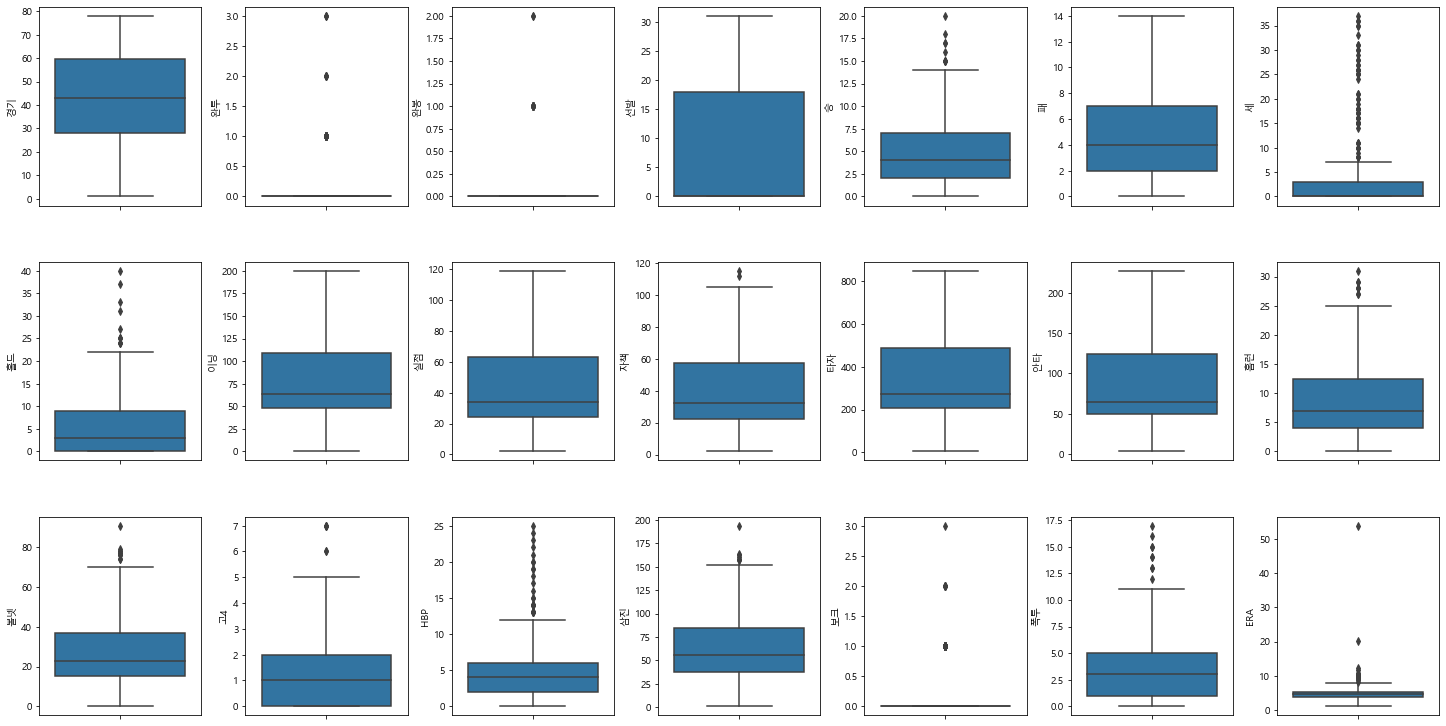

In [79]:
import seaborn as sns

fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in extra_analysis.iloc[:, :21].items():
    sns.boxplot(y=k, data=extra_analysis, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\2817758229.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
C:\Users\jihyu\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


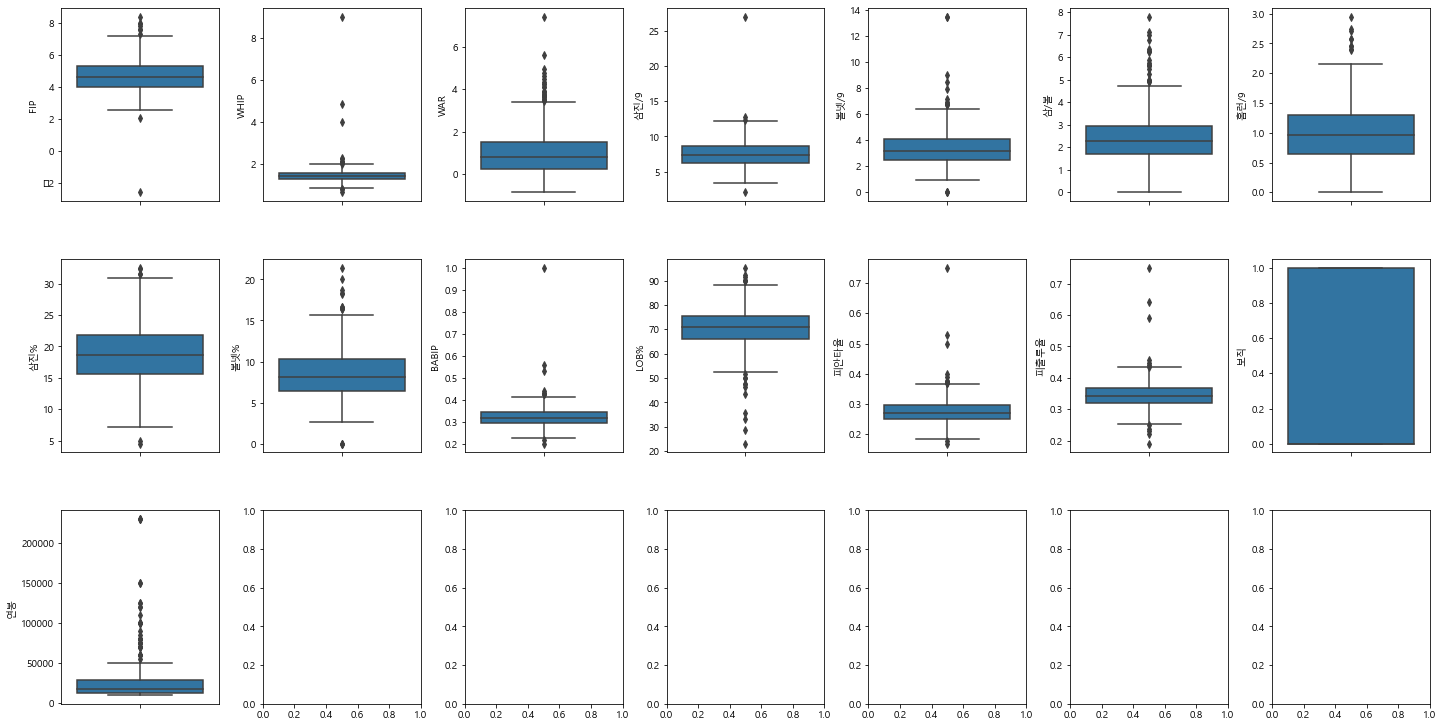

In [80]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in extra_analysis.iloc[:, 21:].items():
    sns.boxplot(y=k, data=extra_analysis, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

세이브, 사구, 연봉, 피안타울 ,LOB% 등 많은 칼럼들이 아웃라이어를 다수 포함한 것을 확인할 수 있었습니다
<br>
<br>
이를 확장하여 각 필드에 얼마나 많은 아웃라이어가 포함되어 있는지 확인해 보겠습니다.

In [81]:
temp = []
for k, v in extra_analysis.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(extra_analysis)[0]
        temp.append((k, perc))
        print("Column %s outliers = %.2f%%" % (k, perc))


Column 경기 outliers = 0.00%
Column 완투 outliers = 100.00%
Column 완봉 outliers = 100.00%
Column 선발 outliers = 0.00%
Column 승 outliers = 2.30%
Column 패 outliers = 0.00%
Column 세 outliers = 15.09%
Column 홀드 outliers = 2.81%
Column 이닝 outliers = 0.00%
Column 실점 outliers = 0.00%
Column 자책 outliers = 0.51%
Column 타자 outliers = 0.00%
Column 안타 outliers = 0.00%
Column 홈런 outliers = 2.05%
Column 볼넷 outliers = 2.81%
Column 고4 outliers = 3.84%
Column HBP outliers = 7.67%
Column 삼진 outliers = 1.79%
Column 보크 outliers = 100.00%
Column 폭투 outliers = 3.58%
Column ERA outliers = 3.58%
Column FIP outliers = 2.30%
Column WHIP outliers = 3.58%
Column WAR outliers = 5.63%
Column 삼진/9 outliers = 1.02%
Column 볼넷/9 outliers = 3.58%
Column 삼/볼 outliers = 4.86%
Column 홈런/9 outliers = 2.30%
Column 삼진% outliers = 1.53%
Column 볼넷% outliers = 3.32%
Column BABIP outliers = 2.56%
Column LOB% outliers = 4.35%
Column 피안타율 outliers = 3.07%
Column 피출루율 outliers = 3.07%
Column 보직 outliers = 0.00%
Column 연봉 outliers = 9.97%


여기서 저희는 각 변수와 연봉 간의 선형관계를 파악할 때
<br>
<br>
더 용이하게 판단하기 위해서 연봉의 outlier 값들을 배제하도록 하겠습니다.


In [82]:
v = extra_analysis.iloc[:, 35]
q1 = v.quantile(0.25)
q3 = v.quantile(0.75)
irq = q3 - q1

v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
print(min(v_col), len(v_col))

55000.0 39


여기서 아웃라이어들 중 최소값은 55000임을 확인했으니
<br>
<br>
모든 연봉 아웃라이어 값들을 제외하고 각 변수들과 비교해 보겠습니다.

In [83]:
extra_analysis_pro = extra_analysis[~(extra_analysis['연봉'] >= 55000.0)]

In [84]:
extra_analysis_pro

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,보직,연봉
1,25.0,1.0,0.0,25.0,11.0,9.0,0.0,0.0,152.2,64.0,...,7.00,0.77,19.2,2.7,0.333,73.6,0.282,0.314,1,40000.0
4,30.0,1.0,1.0,30.0,18.0,5.0,0.0,0.0,189.2,84.0,...,2.86,1.09,16.0,5.6,0.296,75.2,0.269,0.312,1,40000.0
5,31.0,0.0,0.0,29.0,13.0,7.0,0.0,1.0,173.0,98.0,...,2.62,1.46,26.1,10.0,0.304,70.6,0.245,0.325,1,40000.0
8,45.0,0.0,0.0,17.0,11.0,4.0,0.0,10.0,123.1,70.0,...,2.98,1.02,22.5,7.6,0.327,68.6,0.265,0.338,0,30000.0
9,25.0,0.0,0.0,23.0,8.0,7.0,0.0,0.0,125.0,71.0,...,2.43,1.22,20.3,8.3,0.312,70.0,0.270,0.333,1,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,28.0,0.0,0.0,9.0,3.0,7.0,0.0,1.0,77.2,49.0,...,1.42,1.04,10.6,7.4,0.317,68.2,0.304,0.364,0,15500.0
387,33.0,0.0,0.0,8.0,1.0,6.0,0.0,4.0,62.0,52.0,...,1.10,1.16,15.3,13.9,0.283,56.0,0.260,0.370,0,16000.0
388,23.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,20.1,20.0,...,1.17,1.33,21.4,18.4,0.288,53.3,0.240,0.396,0,28000.0
389,63.0,0.0,0.0,0.0,2.0,7.0,8.0,12.0,61.0,33.0,...,1.65,1.62,21.2,12.9,0.259,75.4,0.234,0.335,0,17000.0


상관관계를 파악하기 위해서 히트맵을 그려보았습니다.

C:\Users\jihyu\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\jihyu\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


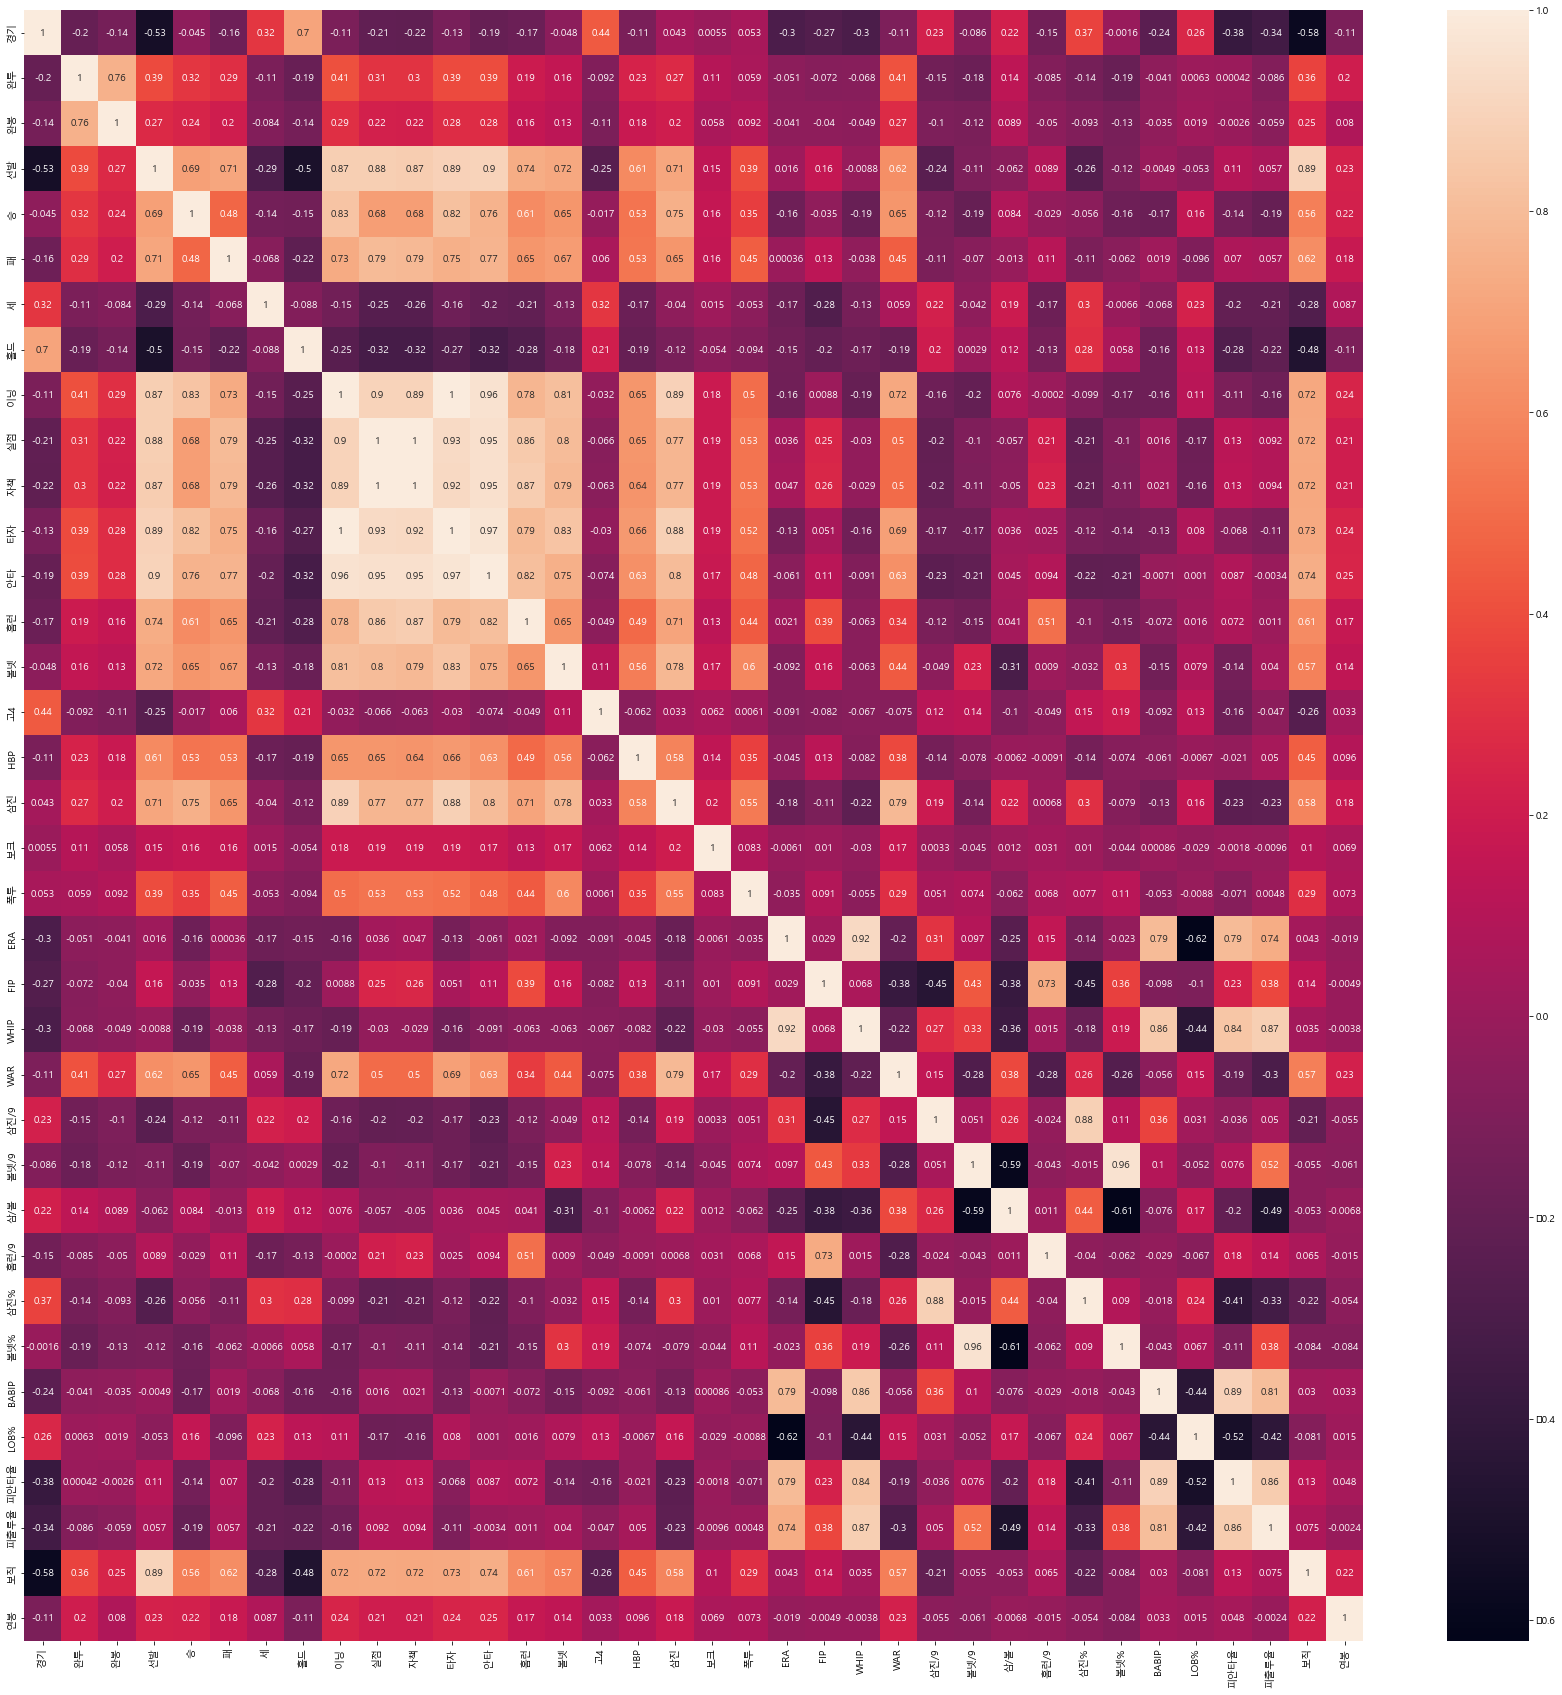

In [85]:
plt.figure(figsize=(30, 30))
sns.heatmap(extra_analysis_pro.corr(),  annot=True)

In [86]:
corr_matrix = extra_analysis_pro.corr()
print(corr_matrix["연봉"].sort_values(ascending=False))

연봉       1.000000
안타       0.250882
이닝       0.242746
타자       0.241257
선발       0.231822
WAR      0.225506
승        0.223845
보직       0.219492
실점       0.206685
자책       0.206315
완투       0.203232
삼진       0.180163
패        0.175070
홈런       0.165670
볼넷       0.141539
HBP      0.096381
세        0.086960
완봉       0.079596
폭투       0.072914
보크       0.068994
피안타율     0.048138
고4       0.033145
BABIP    0.032997
LOB%     0.014929
피출루율    -0.002431
WHIP    -0.003813
FIP     -0.004943
삼/볼     -0.006797
홈런/9    -0.014941
ERA     -0.019032
삼진%     -0.053727
삼진/9    -0.055277
볼넷/9    -0.060862
볼넷%     -0.083773
홀드      -0.110211
경기      -0.112754
Name: 연봉, dtype: float64


위에서부터 안타 칼럼부터 자책 칼럼까지의 데이터의 상관계수가 0.2를 넘는 것을 확인 가능합니다.
<br>
<br>
다른 변수들은 상관계수가 0.2도 되지 않아 무의미하다고 판단하여, 자책까지의 변수들만 가지고
<br>
<br>
분석을 이어나가도록 하겠습니다.
<br>
<br>
분석을 이어나가기 전, 각 변수들에 대한 설명을 하도록 하겠습니다.
<br>
<br>
안타 : 한 시즌 동안 투수의 피안타의 개수
<br>
이닝 : 한 시즌 동안 투수가 던진 총 이닝 수
<br>
타자 : 한 시즌 동안 투수가 상대한 타자의 수
<br>
선발 : 한 시즌 동안 투수가 선발로 나온 경기의 수
<br>
승 : 한 시즌 동안 투수가 승리한 수
<br>
WAR : 대체선수 대비 승리기여도. 선수가 팀 승리에 얼마나 기여했는가를 표현하는 종합적인 성격의 스탯이다. 
<br>
보직 : 한 시즌 동안 선발 수/경기 수
<br>
실점 : 한 시즌 동안 투수의 총 실점
<br>
자책 : 한 시즌 동안 투수의 총 자책점(투수가 책임을 져야 할 실점)
<br>
완투 : 한 시즌 동안 투수가 한 경기에서 시작부터 마지막까지 마운드를 지킨 횟수
<br>
삼진 : 한 시즌 동안 투수의 총 삼진 개수
<br>
패 : 한 시즌 동안 투수의 총 패배
<br>
홈런 : 한 시즌 동안 투수의 총 피홈런의 수
<br>
볼넷 : 한 시즌 동안 투수의 총 볼넷 개수

MinMaxScaler를 사용하여 각 변수들과 연봉간의 관계를 분석해 보았습니다.

In [109]:
#스케일러 keep : X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)

C:\Users\jihyu\AppData\Local\Temp\ipykernel_12032\3269425971.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
C:\Users\jihyu\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


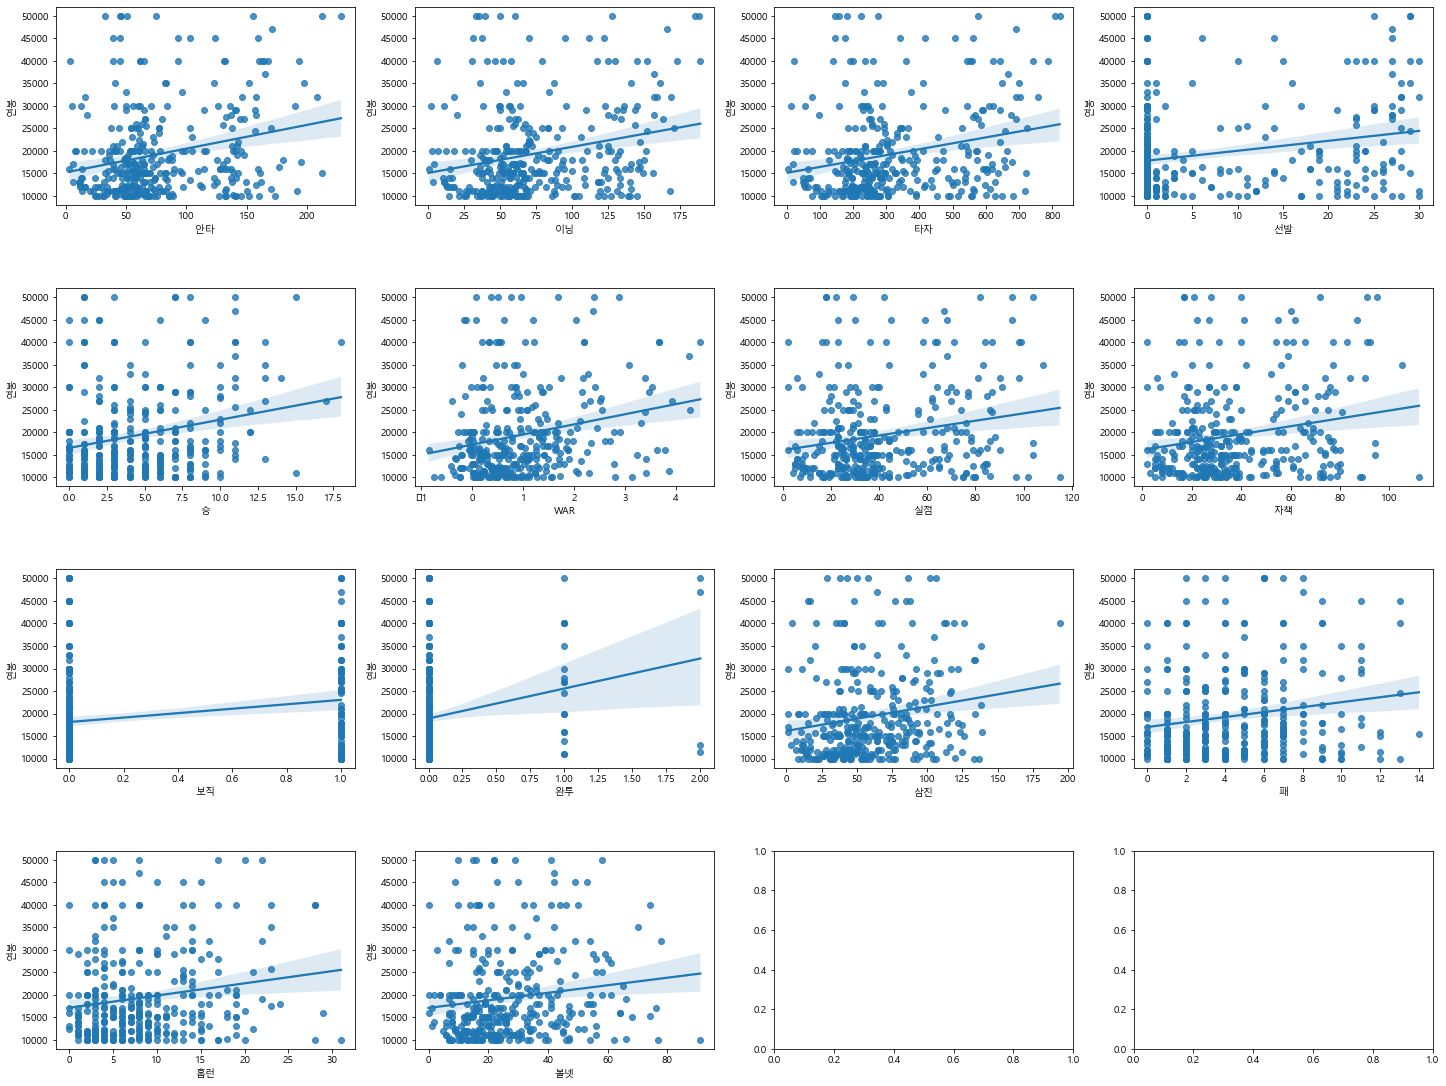

In [147]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
column_sels = ['안타', '이닝', '타자', '선발', '승', 'WAR', '실점', '자책', '보직', '완투', '삼진', '패', '홈런', '볼넷']
X = extra_analysis_pro.loc[:,column_sels]
y = extra_analysis_pro['연봉']
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [159]:
import statsmodels.api as sm

X = extra_analysis_pro.loc[:,column_sels]
y = extra_analysis_pro['연봉']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     연봉   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              77.48
Date:                Mon, 02 May 2022   Prob (F-statistic):                    2.33e-96
Time:                        14:45:47   Log-Likelihood:                         -3761.2
No. Observations:                 352   AIC:                                      7550.
Df Residuals:                     338   BIC:                                      7605.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
안타          -132.5667    145.481     -0.911      0.363    -418.729     153.595
이닝          -828.4421    456.073     -1.816      0.070   -1725.540      68.656
타자           330.3438    147.544      2.239      0.026      40.124     620.564
선발         -1457.5793    188.771     -7.721      0.000   -1828.894   -1086.264
승           -247.7287    321.266     -0.771      0.441    -879.661     384.204
WAR         3081.4627   1974.807      1.560      0.120    -802.997    6965.922
실점          -183.3874    278.406     -0.659      0.511    -731.014     364.240
자책           184.2523    270.418      0.681      0.496    -347.662     716.167
보직          1.155e+04   3101.455      3.726      0.000    5454.003    1.77e+04
완투           911.1814   2369.919      0.384      0.701   -3750.467    5572.830
삼진          -148.4581     82.215     -1.806      0.072    -310.176      13.260
패            -55.4946    324.187     -0.171      0.864    -693.173     582.184
홈런           201.6320    286.945      0.703      0.483    -362.791     766.055
볼넷          -163.0190    148.556     -1.097      0.273    -455.230     129.192
==============================================================================
Omnibus:                       67.280   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.585
Skew:                           1.101   Prob(JB):                     2.16e-25
Kurtosis:                       4.702   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
from sklearn.model_selection import train_test_split

X = extra_analysis_pro.loc[:,column_sels]
y = extra_analysis_pro['연봉']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [150]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [151]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print(rmse_tr)
print(rmse_test)

9217.126330039519
9679.38932751995


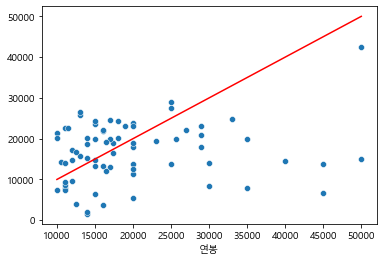

In [152]:
pred = lm.predict(X_test)
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')

마지막으로 해당 모델로 최동원 선수의 연봉을 예측해보도록 하겠습니다.

In [153]:
choi_rm

,경기,완투,완봉,선발,승,패,세,홀드,이닝,실점,...,볼넷/9,삼/볼,홈런/9,삼진%,볼넷%,BABIP,LOB%,피안타율,피출루율,보직
0,38.0,16.0,1.0,21.0,9.0,16.0,4.0,0.0,208.2,89.0,...,2.20,2.90,0.73,17.1,5.9,0.297,72.5,0.257,0.309,1
1,51.0,14.0,1.0,20.0,27.0,13.0,6.0,0.0,284.2,91.0,...,2.15,3.28,0.57,19.7,6.0,0.267,77.0,0.224,0.280,0
2,42.0,14.0,4.0,17.0,20.0,9.0,8.0,0.0,225.0,60.0,...,1.64,3.93,0.28,18.6,4.7,0.257,76.0,0.214,0.257,0
3,39.0,17.0,4.0,21.0,19.0,14.0,2.0,0.0,267.0,60.0,...,1.85,3.78,0.24,20.0,5.3,0.268,80.3,0.215,0.262,1
4,32.0,15.0,4.0,22.0,14.0,12.0,2.0,0.0,224.0,80.0,...,2.45,2.67,0.24,17.7,6.6,0.318,74.2,0.262,0.317,1
5,16.0,3.0,1.0,4.0,7.0,3.0,3.0,0.0,83.1,24.0,...,2.59,3.46,0.43,23.8,6.9,0.317,80.9,0.244,0.298,0


In [154]:
print(choi_rm.loc[:,column_sels].mean())

안타     183.333333
이닝     215.250000
타자     861.333333
선발      17.500000
승       16.000000
WAR      7.891667
실점      67.333333
자책      54.333333
보직       0.500000
완투      13.166667
삼진     164.333333
패       11.166667
홈런       9.833333
볼넷      50.000000
dtype: float64


In [155]:
print(extra_analysis.loc[:, column_sels].mean())

안타      82.708440
이닝      77.858568
타자     340.966752
선발       7.828645
승        4.943734
WAR      1.087980
실점      42.618926
자책      39.074169
보직       0.286445
완투       0.117647
삼진      63.122762
패        4.524297
홈런       8.670077
볼넷      27.818414
dtype: float64


최동원 선수의 경우, 연봉에 영향을 주는 모든 수치에서 어마어마한 수치를 보였습니다.
<br>
<br>
그리고 마지막 시즌을 제외하고는 선발로 뛴 경우가 굉장히 많았습니다.
<br>
<br>
그러므로 최동원 선수의 연봉은 아웃라이어인 5억 5천 근처까지 도달할 것으로 예상합니다.

In [165]:
pred = lm.predict(choi_rm.loc[:,column_sels])
cnt = 0
for i in range(1983, 1989, 1):
    print('{}시즌 기반 다음해 연봉(예상) : '.format(i), pred.iloc[cnt])
    cnt += 1

1983시즌 기반 다음해 연봉(예상) :  62806.14446121041
1984시즌 기반 다음해 연봉(예상) :  71047.67274198437
1985시즌 기반 다음해 연봉(예상) :  58446.84486036451
1986시즌 기반 다음해 연봉(예상) :  81156.11779385165
1987시즌 기반 다음해 연봉(예상) :  65793.2374087714
1988시즌 기반 다음해 연봉(예상) :  26807.44521116387


In [166]:
choi_rm.loc[:,column_sels]

,안타,이닝,타자,선발,승,WAR,실점,자책,보직,완투,삼진,패,홈런,볼넷
0,202.0,208.2,863.0,21.0,9.0,5.00,89.0,67.0,1,16.0,148.0,16.0,17.0,51.0
1,229.0,284.2,1132.0,20.0,27.0,9.72,91.0,76.0,0,14.0,223.0,13.0,18.0,68.0
2,170.0,225.0,865.0,17.0,20.0,9.88,60.0,48.0,0,14.0,161.0,9.0,7.0,41.0
3,204.0,267.0,1039.0,21.0,19.0,11.74,60.0,46.0,1,17.0,208.0,14.0,7.0,55.0
4,218.0,224.0,920.0,22.0,14.0,7.15,80.0,70.0,1,15.0,163.0,12.0,6.0,61.0
5,77.0,83.1,349.0,4.0,7.0,3.86,24.0,19.0,0,3.0,83.0,3.0,4.0,24.0


예상대로 최동원 선수의 경우 1984, 1986, 1987년 시즌에 어마어마한 연봉치를 보여주었습니다.
<br>
<br>
마지막 1988년도 시즌에는 뛴 경기수도 적고 모든 수치에서 부진했기 때문에 2억 가까이 받는 것으로 모델이 예상했습니다.

다만 몇 가지 수치는 의아한 부분이 있었습니다.
<br>
<br>
원래 피안타, 실점, 자책 부분이 높은 경우, 좋은 평가를 받기 어려운데
<br>
<br>
이 부분은 이닝수가 많아짐에 따라서 같이 오르는 수치들이기 때문에,
<br>
<br>
최종적으로 많은 이닝을 잘 던지는 선수가 좋은 평가를 받는다고 볼 수 있었습니다.
<br>
<br>
이는 84 시즌과 86 시즌의 비교로 알 수 있는데, 자책점이 현저히 낮은 86 시즌에 기록한
<br>
<br>
높은 WAR 수치로 인해서 86 시즌의 연봉 예측값이 1억 가량 많은 것으로 확인할 수 있습니다.